<a href="https://colab.research.google.com/github/chocozzang/My_Python_Practice/blob/main/%EC%9E%91%EC%97%85_2%EC%9C%A0%ED%98%95_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv', encoding='utf-8')

x = data[data.columns[3:5]]

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

from sklearn.cluster import KMeans

In [9]:
wcss = []

for i in range(1, 21):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit_transform(x)
  wcss.append(kmeans.inertia_)

wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37442.247450375704,
 30273.394312070042,
 25022.48500453035,
 21850.165282585636,
 19739.30967392822,
 17595.28888108518,
 15810.343426539726,
 14382.737178507767,
 12825.554989618224,
 11953.610394145151,
 11016.719611185914,
 10061.343714881605,
 9541.405858272163,
 8843.993476784653,
 8311.237159409218]

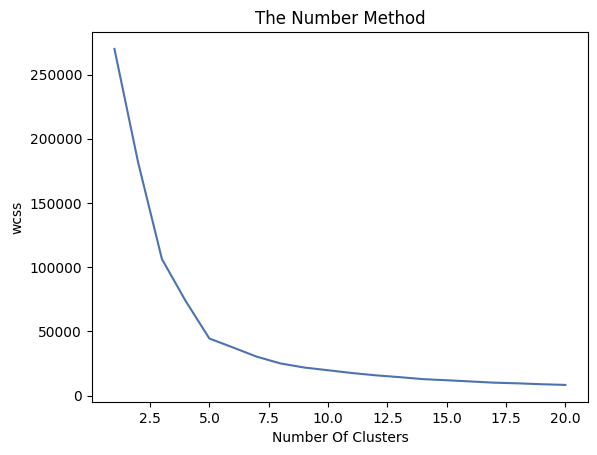

In [11]:
plt.figure()
plt.plot(range(1, 21), wcss)
plt.title('The Number Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss')

plt.show()

In [13]:
kmeans2 = KMeans(n_clusters = 5)
y_means = kmeans2.fit_predict(x)
y_means

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [14]:
Group_cluster = pd.DataFrame(y_means)
Group_cluster.columns = ['Group']

full_data = pd.concat([data, Group_cluster], axis = 1)
full_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,4


In [17]:
kmeans_predict = KMeans(n_clusters = 5, random_state = 42).fit(x)
kmeans_predict.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [19]:
kmeans_predict.predict([[100, 50], [30, 80]])

array([4, 3], dtype=int32)

In [20]:
labels = [('Cluster' + str(i + 1)) for i in range(5)]
labels

['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']

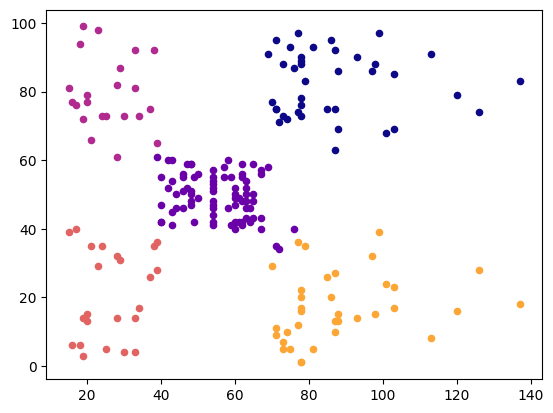

In [22]:
X = np.array(x)
plt.figure()
for i in range(5):
  plt.scatter(X[y_means == i, 0], X[y_means == i, 1], s = 20, c = cmap(i/5), label = labels[i])

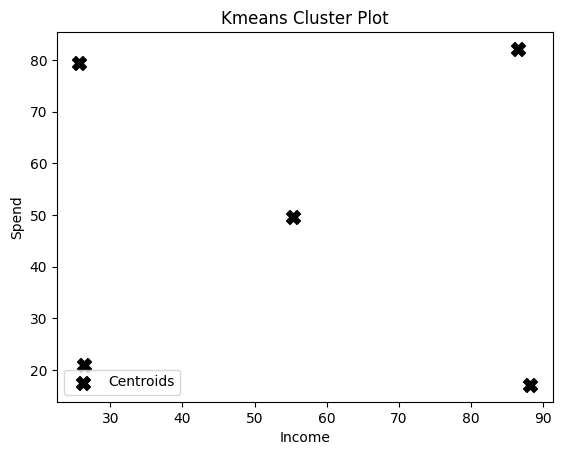

In [25]:
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = 'X')

plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans Cluster Plot')
plt.legend()
plt.show()

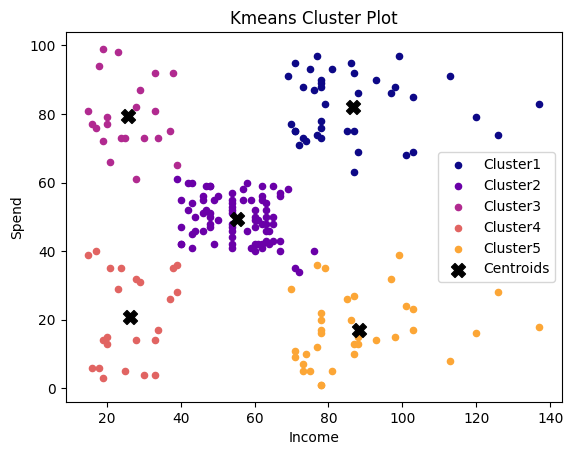

In [26]:
X = np.array(x)
plt.figure()
for i in range(5):
  plt.scatter(X[y_means == i, 0], X[y_means == i, 1], s = 20, c = cmap(i/5), label = labels[i])
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = 'X')

plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans Cluster Plot')
plt.legend()
plt.show()

In [29]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv', encoding = 'utf-8')
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [31]:
x_iris = iris.drop(['Species'], axis = 1)
x_iris = x_iris[x_iris.columns[1:5]]
y_iris = iris[['Species']]
x_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
x_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_iris)
x_scale = scaler.transform(x_iris)
pd.DataFrame(x_scale).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [36]:
K = range(1, 10)
KM = [KMeans(n_clusters = k).fit(x_scale) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [38]:
D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]
D_k

[array([[ 6.34507683],
        [ 5.91692488],
        [ 5.83609458],
        [ 5.7497826 ],
        [ 6.32139225],
        [ 6.88621812],
        [ 5.8966092 ],
        [ 6.23297682],
        [ 5.45618915],
        [ 5.98999165],
        [ 6.71863081],
        [ 6.09918027],
        [ 5.83180932],
        [ 5.35817133],
        [ 7.14982517],
        [ 7.36613874],
        [ 6.79852925],
        [ 6.34901567],
        [ 7.06470098],
        [ 6.54140658],
        [ 6.60681466],
        [ 6.48922183],
        [ 5.92958683],
        [ 6.32771681],
        [ 6.18465844],
        [ 6.04979338],
        [ 6.26737585],
        [ 6.44825558],
        [ 6.37181293],
        [ 5.91016074],
        [ 5.93717104],
        [ 6.56734345],
        [ 6.79043445],
        [ 7.06328535],
        [ 5.98999165],
        [ 6.05970296],
        [ 6.65056389],
        [ 5.98999165],
        [ 5.48543526],
        [ 6.31347765],
        [ 6.24739946],
        [ 5.22685374],
        [ 5.59732079],
        [ 6

In [39]:
cIdx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avgWithinSS = [sum(d) / x_scale.shape[0] for d in dist]

In [40]:
wcss2 = [sum(d**2) for d in dist]
tss2  = sum((pdist(x_scale)**2)/x_scale.shape[0])
bss2 = tss2 - wcss2

Text(0, 0.5, 'Average within - cluster sum of squares')

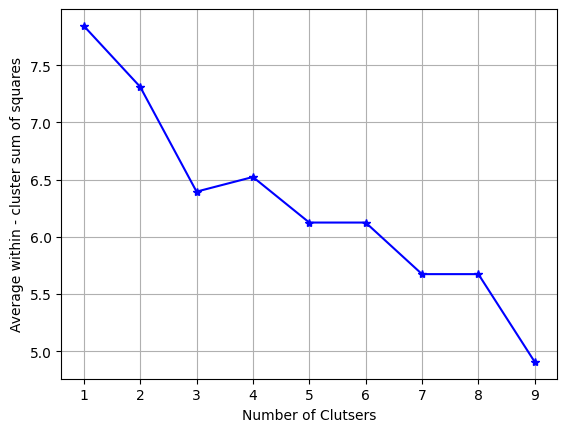

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clutsers')
plt.ylabel('Average within - cluster sum of squares')

Text(0, 0.5, 'Average within - cluster sum of squares')

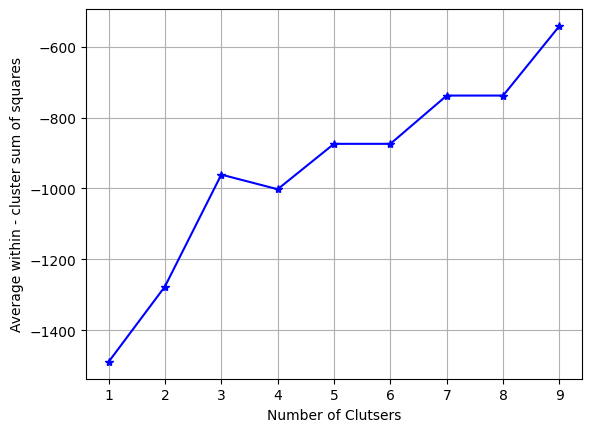

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss2/tss2 * 100, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clutsers')
plt.ylabel('Average within - cluster sum of squares')

In [44]:
import numpy as np

w, v = np.linalg.eig(np.array([[0.91335, 0.75969], [0.75969, 0.69702]]))
print("\nEigen Values\n", w)
print("\nEigen Vectors\n", v)


Eigen Values
 [1.57253666 0.03783334]

Eigen Vectors
 [[ 0.75530088 -0.6553782 ]
 [ 0.6553782   0.75530088]]


In [46]:
k_means_fit = KMeans(n_clusters = 4, max_iter = 300)
k_means_fit.fit(x_scale)

KMeans(n_clusters=4)

In [48]:
k_means_fit.cluster_centers_

array([[-0.73463631,  1.45201075, -1.29704352, -1.21071997],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [-1.34320731,  0.12656736, -1.31407576, -1.30726051]])

In [51]:
#print("\nK-Means Clustering - Confusion Matrix\n\n", pd.crosstab(y_iris, k_means_fit.labels_, rownames = ['Actuall'], colnames = ['Predicted']))

ValueError: ignored

In [50]:
print("\nSilhouette-score : %0.3f" % silhouette_score(x_iris, k_means_fit.labels_, metric ='euclidean'))


Silhouette-score : 0.356


In [53]:
for k in range(2, 10):
  k_means_fitk = KMeans(n_clusters = k, max_iter = 300)
  k_means_fitk.fit(x_iris)
  print("For K value ", k, ", Silhouette-score : %0.3f" % silhouette_score(x_iris, k_means_fitk.labels_, metric='euclidean'))

For K value  2 , Silhouette-score : 0.681
For K value  3 , Silhouette-score : 0.553
For K value  4 , Silhouette-score : 0.498
For K value  5 , Silhouette-score : 0.489
For K value  6 , Silhouette-score : 0.371
For K value  7 , Silhouette-score : 0.349
For K value  8 , Silhouette-score : 0.353
For K value  9 , Silhouette-score : 0.345


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap3 = matplotlib.cm.get_cmap('plasma')

In [58]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv', encoding='utf-8')
x = data2.iloc[:, [3, 4]].values

import scipy.cluster.hierarchy as sch

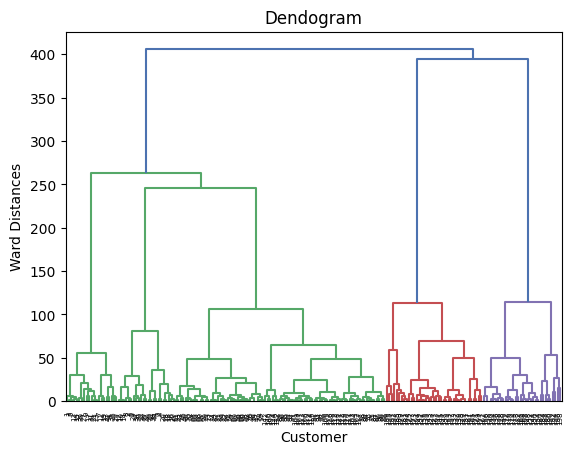

In [60]:
plt.figure(1)
z = sch.linkage(x, method = 'ward')
dendrogram = sch.dendrogram(z)
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('Ward Distances')
plt.show()

In [61]:
k = 5

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

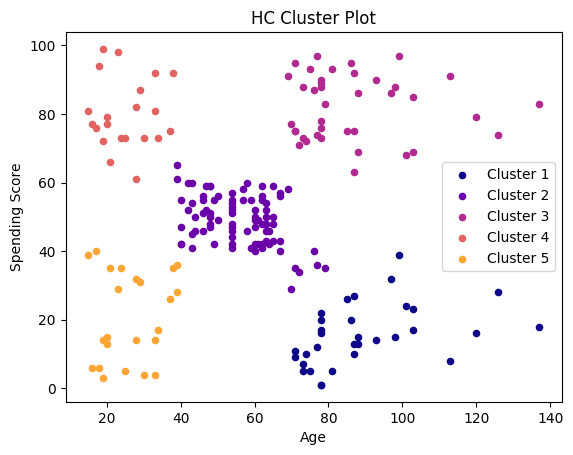

In [63]:
labels = [('Cluster ' + str(i + 1)) for i in range(k)]
plt.figure(2)

for i in range(k) :
  plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s = 20, c = cmap(i/k), label = labels[i])

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('HC Cluster Plot')
plt.legend()
plt.show()